In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
data = pd.read_csv("housing.csv")

In [129]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [130]:
# drop the NA data
data.dropna(inplace = True)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [132]:
# from sklearn.model_selection import train_test_split
# X = data.drop(['median_house_value'], axis=1)
# Y = data['median_house_value']

In [133]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [134]:
# train_data = X_train.join(Y_train)
train_data = data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

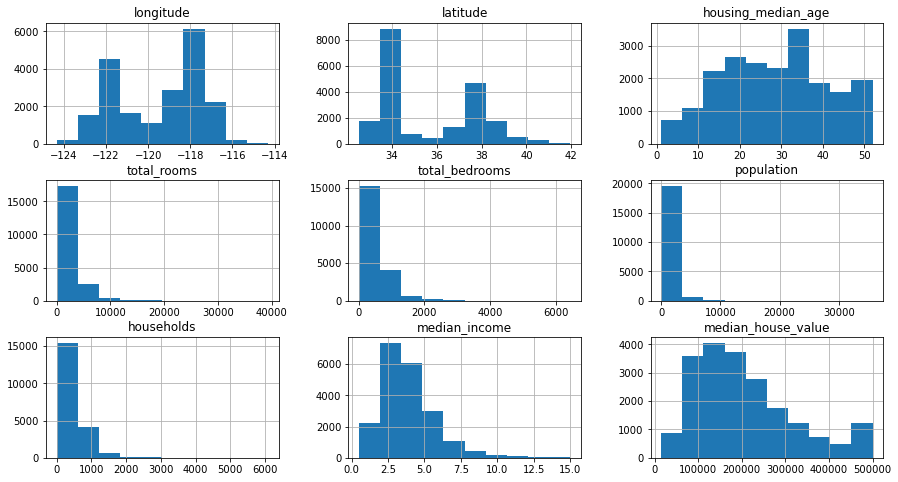

In [135]:
train_data.hist(figsize = (15, 8))

<AxesSubplot:>

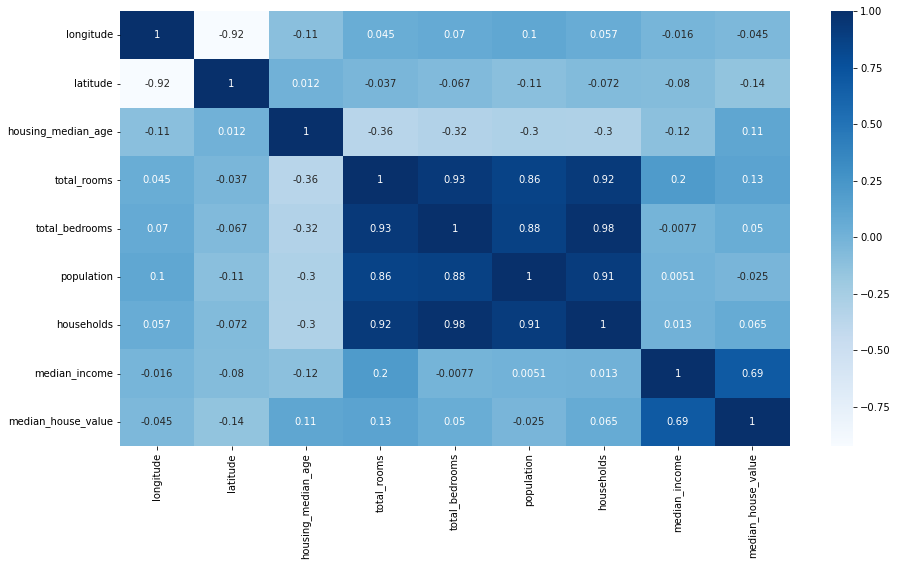

In [136]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap="Blues")

In [137]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

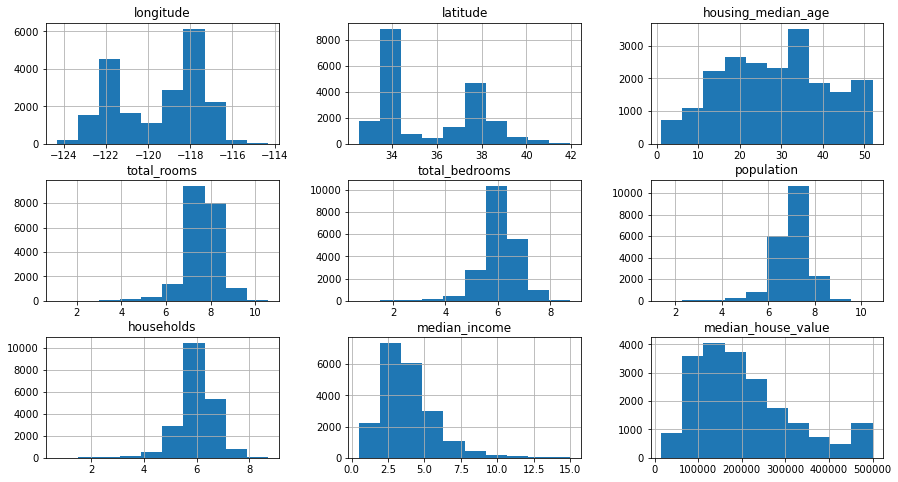

In [138]:
train_data.hist(figsize = (15, 8))

In [139]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [140]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<AxesSubplot:>

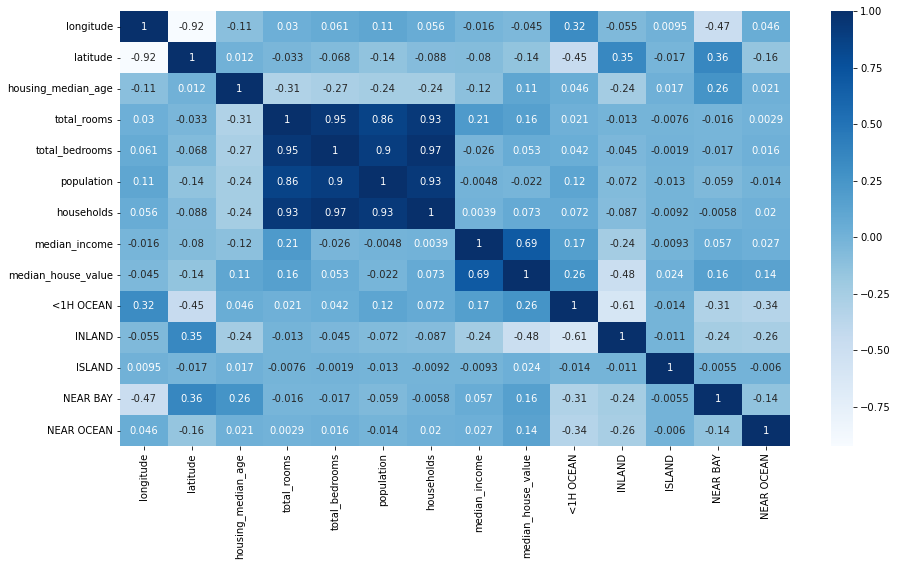

In [141]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap="Blues")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

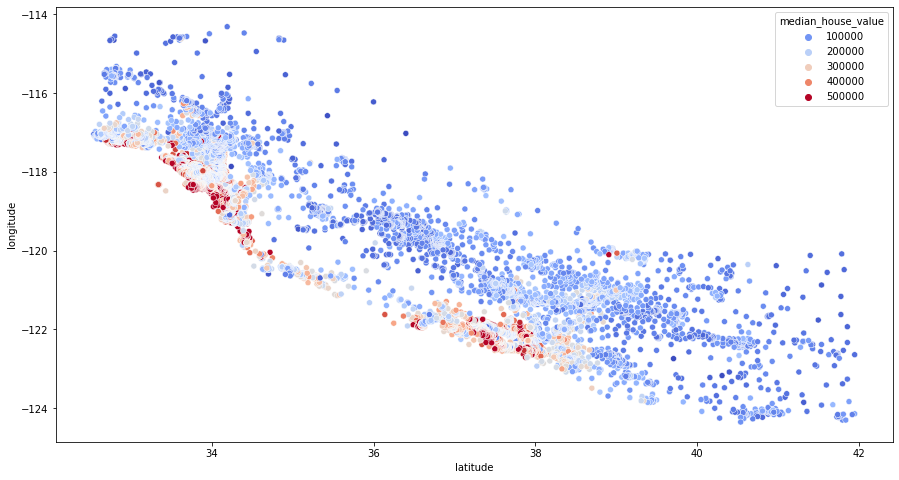

In [142]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue ='median_house_value', palette='coolwarm')

In [143]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

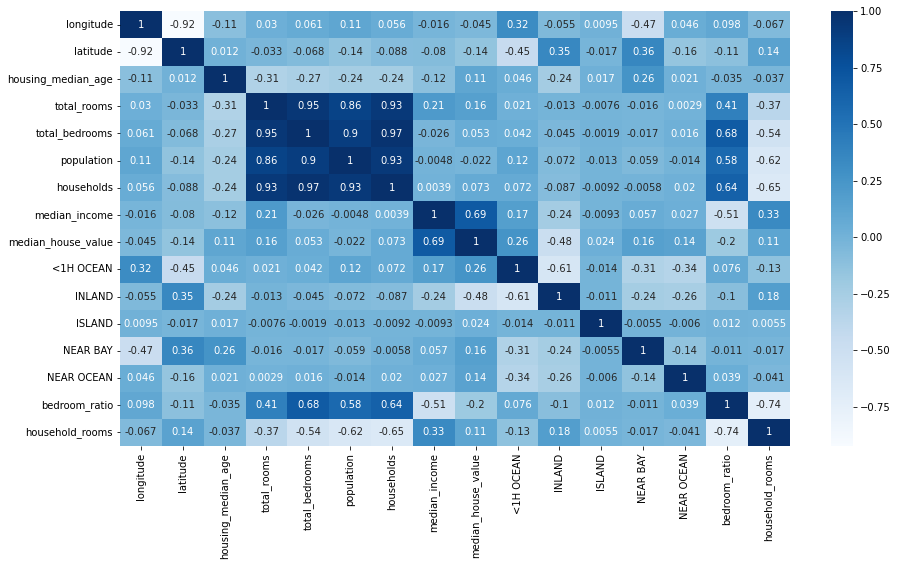

In [144]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap="Blues")

In [145]:
from sklearn.model_selection import train_test_split
X = train_data.drop(['median_house_value'], axis=1)
Y = train_data['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [146]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [147]:
# linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, Y_train)

LinearRegression()

In [148]:
X_test_s = scaler.transform(X_test)
reg.score(X_test_s, Y_test)

-0.017098738364853983

In [149]:
# random forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train_s, Y_train)
forest.score(X_test_s, Y_test)

0.8215579621690677

In [156]:
# from sklearn.model_selection import GridSearchCV

# forest = RandomForestRegressor()
# param_grid = {
#     'n_estimators':[100, 200, 300],
#     'max_depth': [2, 4, 6],
# }

# grid_search = GridSearchCV(forest, param_grid, cv=5, 
#                            scoring='neg_mean_squared_error',
#                            return_train_score=True)

# grid_search.fit(X_train_s, Y_train)

In [157]:
best_forest = grid_search.best_estimator_

In [158]:
best_forest.score(X_test_s, Y_test)

0.7875507974216557